# うなりとFFTの関係

In [63]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [64]:
plt.rcParams['font.family'] = 'IPAexGothic' # IPAゴシック
plt.rcParams['figure.figsize'] = [12.0, 4.0] # 全体のサイズ
plt.rcParams['lines.linewidth'] = 2. # プロットの線の太さ
plt.rcParams['lines.markersize'] = 10. # マーカーの大きさ
plt.rcParams['lines.markeredgewidth'] = 3. # マーカーの線幅
plt.rcParams['font.size'] = 20 #フォントサイズを設定
plt.rcParams['axes.linewidth'] = 1.5 #軸の太さを設定。目盛りは変わらない
plt.rcParams['xtick.major.size'] = 10. #x軸目盛りの長さ
plt.rcParams['xtick.major.width'] = 2.5 #x軸目盛りの太さ
plt.rcParams['xtick.minor.size'] = 5. #x軸目盛りの長さ
plt.rcParams['xtick.minor.width'] = 1.5 #x軸目盛りの太さ
plt.rcParams['ytick.major.size'] = 10. #y軸目盛りの長さ
plt.rcParams['ytick.major.width'] = 2.5 #y軸目盛りの太さ
plt.rcParams['ytick.minor.size'] = 5. #y軸目盛りの長さ
plt.rcParams['ytick.minor.width'] = 1.5 #y軸目盛りの太さ
plt.rcParams['grid.linewidth'] = 1.5 # gridの太さ
plt.rcParams['figure.facecolor'] = 'white' # 図の背景色

## 波の作成

In [65]:
sampling_rate = 1e3
data_length = int(1e4)

(0.0, 1.0)

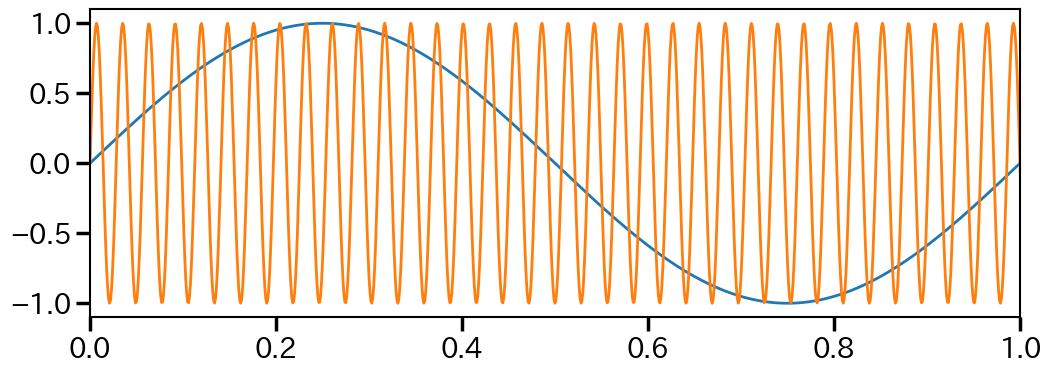

In [66]:
frequency = [1., 35.5]
phase = [0., 0.]
amplitude = [1., 1.]
xtime = arange(data_length) / sampling_rate
signal = [sin(xtime * 2 * pi * f + p) * a for f, p, a in zip(frequency, phase, amplitude)]
for s in signal:
    plot(xtime, s, '-')
xlim([0, 1])

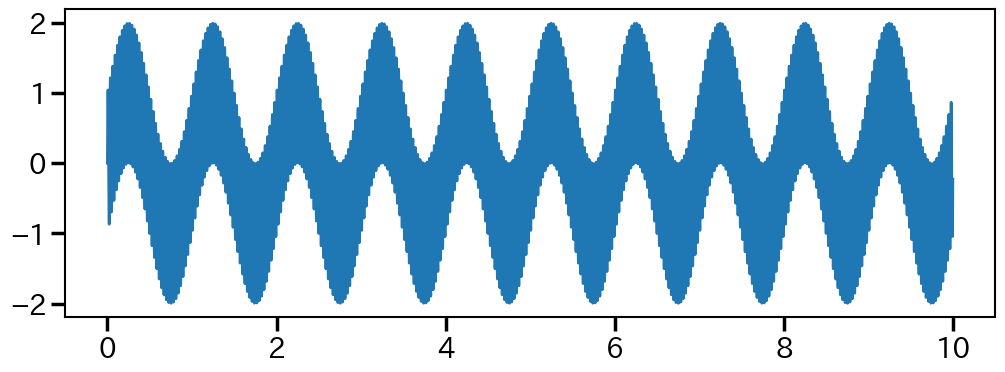

In [67]:
plot(xtime, sum(signal, axis=0), '-')

(0.0, 1.0)

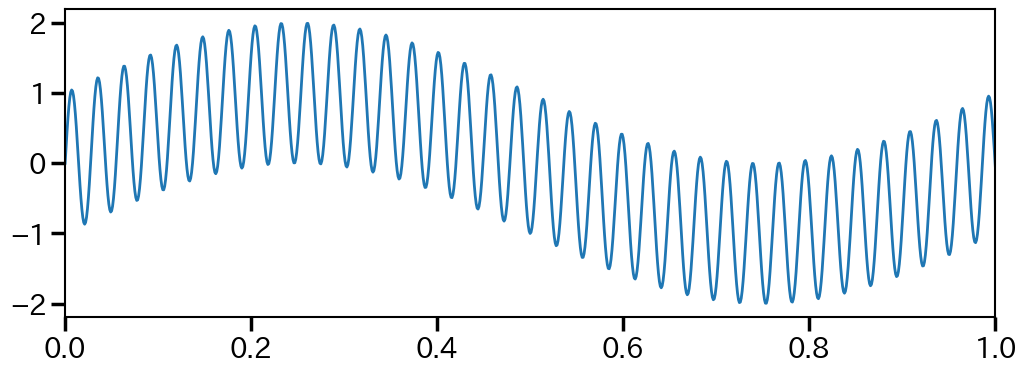

In [68]:
plot(xtime, signal[0] + signal[1], '-')
xlim(0, 1)

### FFT (シグナルだけ)

In [69]:
p, f = mlab.psd(sum(signal, axis=0), Fs=sampling_rate, NFFT=data_length)
plot(f, p)
xscale('log')
yscale('log')
grid()

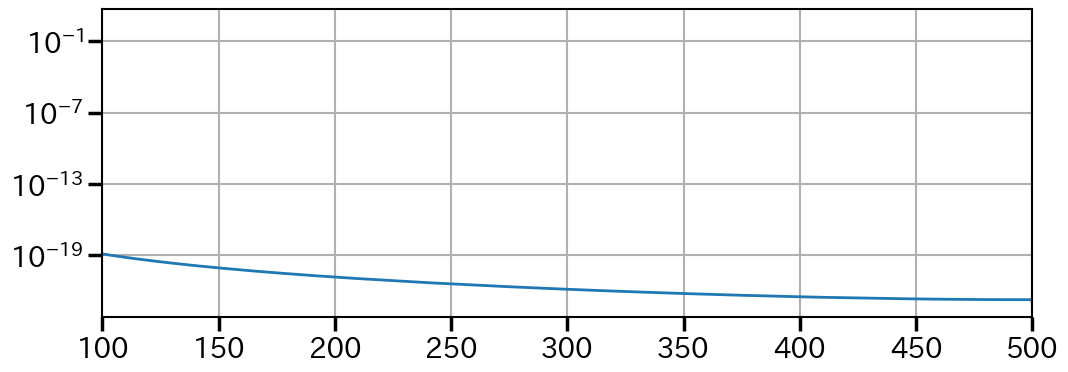

In [70]:
plot(f, p)
#xscale('log')
yscale('log')
xlim(100, 500)
grid()

300Hzと310Hzに波があるだけで、10Hzには何もない

## 白色ノイズを追加してみる

In [71]:
white_amplitude = 0.3
white_noise = random.randn(data_length) * white_amplitude
plot(xtime, white_noise)

In [72]:
plot(xtime, sum(signal, axis=0) + white_noise)
xlim(0, 0.1)

(0.0, 0.1)

### FFT (白色ノイズ入り)

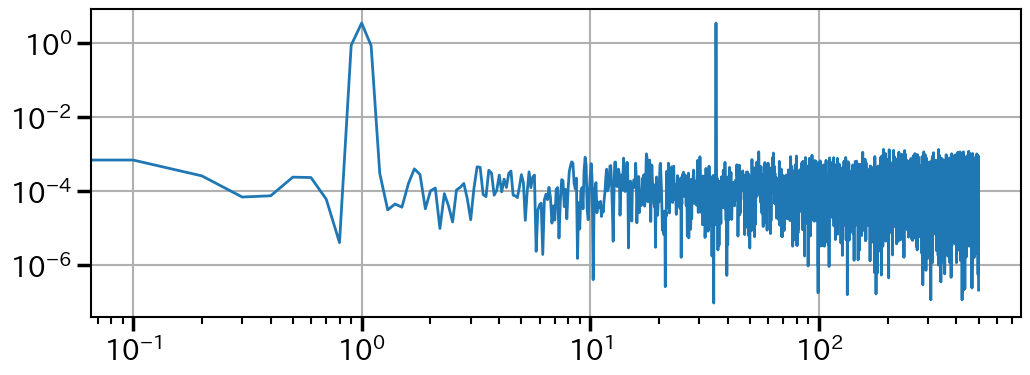

In [73]:
p, f = mlab.psd(sum(signal, axis=0) + white_noise,
                Fs=sampling_rate, NFFT=data_length)
plot(f, p)
xscale('log')
yscale('log')
grid()

白色ノイズによるノイズフロアがついたが、10Hzのうなりは見えない

## 非線形応答1：saturation
- 信号の最大値を制限
- $F(x) = \textrm{min}(x, max\_value)$

In [74]:
max_value = 1.2
F1 = lambda x: maximum(minimum(x, max_value), - max_value)

In [75]:
plot(xtime, sum(signal, axis=0), '--', color='tab:orange')
plot(xtime, F1(sum(signal, axis=0)))
xlim(0, 0.2)

(0.0, 0.2)

### FFT (satulation)

In [81]:
p, f = mlab.psd(sum(signal, axis=0),
                Fs=sampling_rate, NFFT=data_length)
plot(f, p, '--', color='tab:orange')
p, f = mlab.psd(F1(sum(signal, axis=0)),
                Fs=sampling_rate, NFFT=data_length)
plot(f, p, 'b', color='tab:blue')
xscale('linear')
yscale('log')
xlim([34, 37])
grid()

/tmp/ipykernel_486888/2785085395.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plot(f, p, 'b', color='tab:blue')


10Hzの波ができた

## 非線形応答2：二次の効果
- $\textrm{abs}(F(x)) = \textrm{abs}(x (1.0 - 0.1 x))$

In [77]:
F2 = lambda x: sign(x) * (abs(x) - 0.2 * x * x)

In [78]:
plot(xtime, sum(signal, axis=0), '--', color='tab:orange')
plot(xtime, F2(sum(signal, axis=0)), color='tab:blue')
xlim(0, 0.2)

(0.0, 0.2)

### FFT (二次の効果)

In [79]:
p, f = mlab.psd(sum(signal, axis=0),
                Fs=sampling_rate, NFFT=data_length)
plot(f, p, '--', color='tab:orange')
p, f = mlab.psd(F2(sum(signal, axis=0)),
                Fs=sampling_rate, NFFT=data_length)
plot(f, p, color='tab:blue')
xscale('log')
yscale('log')
grid()